In [1]:
import re
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load sentiment distribution and forex price data
sentiment_data = pd.read_excel('E:/zuoye/PROJECT_1/Sentiment_NEWS/weighted_sentiments_by_day.xlsx')
forex_data = pd.read_csv('E:/zuoye/PROJECT_1/Forex_indicators/eurusd_forex_data.csv')  

# Converts the Date column in forex data to date format and to UTC time zone
forex_data['Date'] = pd.to_datetime(forex_data['Date']).dt.tz_convert('UTC')

# Make sure the 'Date' column of the emotional data is also in date format and localized to UTC (or whatever time zone you need)
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date']).dt.tz_localize('UTC')

# Merge sentiment data and forex data by date
data = pd.merge(forex_data, sentiment_data, on='Date', how='inner')

# Print the merged data
print(data.head())

                       Date      Open      High       Low     Close  \
0 2018-09-21 00:00:00+00:00  1.177607  1.180164  1.173571  1.177593   
1 2018-09-24 00:00:00+00:00  1.175102  1.181502  1.172525  1.175102   
2 2018-09-25 00:00:00+00:00  1.175323  1.179245  1.173254  1.175295   
3 2018-09-26 00:00:00+00:00  1.176609  1.177700  1.172897  1.176318   
4 2018-09-27 00:00:00+00:00  1.174715  1.175917  1.166453  1.174853   

   Adj Close  Volume  eur_positive  eur_neutral  eur_negative  usd_positive  \
0   1.177593       0      0.146614     0.085322      0.168063      0.168063   
1   1.175102       0      0.917105     0.667258      1.215637      1.215637   
2   1.175295       0      1.444370     0.765698      0.989932      0.989932   
3   1.176318       0      0.858794     0.553927      0.687279      0.687279   
4   1.174853       0      1.419585     0.761803      1.168612      1.168612   

   usd_neutral  usd_negative  
0     0.085322      0.146614  
1     0.667258      0.917105  
2    

Close           1.000000
Adj Close       1.000000
Open            0.999986
High            0.997124
Low             0.996658
Date            0.529893
eur_negative    0.424687
usd_positive    0.424687
eur_neutral     0.371789
usd_neutral     0.371789
eur_positive    0.360072
usd_negative    0.360072
Volume               NaN
Name: Close, dtype: float64


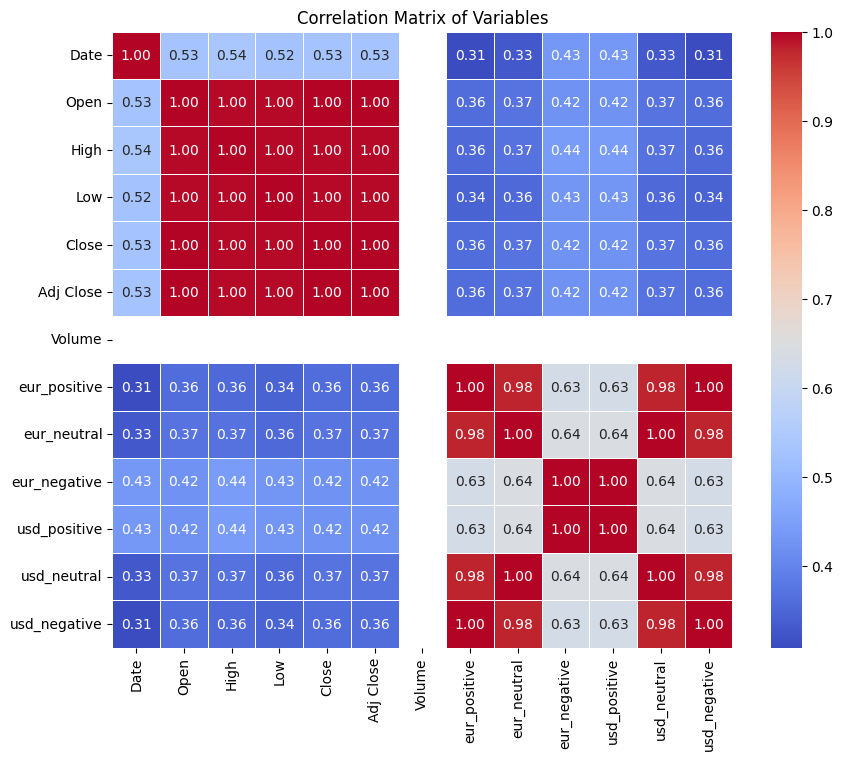

In [3]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Look at the correlation with the 'Close' column
print(correlation_matrix['Close'].sort_values(ascending=False))
# Draw a heat map to show the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()

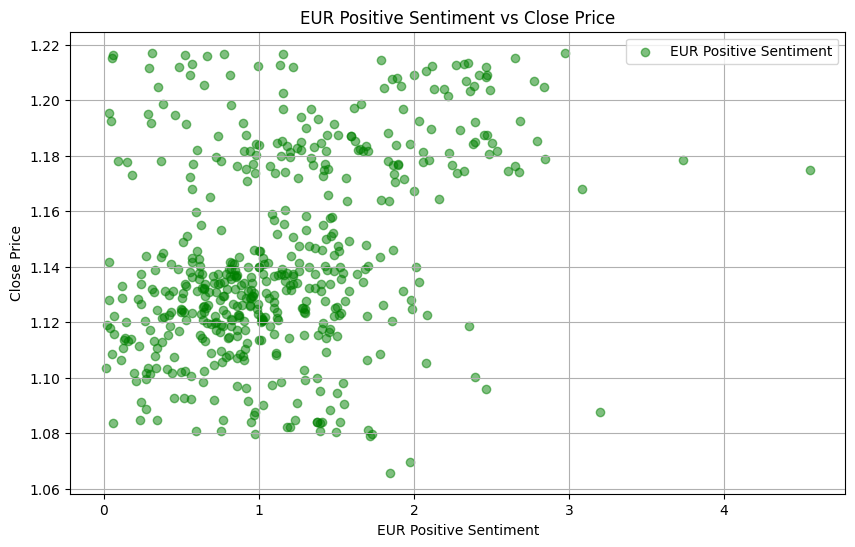

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['eur_positive'], data['Close'], alpha=0.5, label='EUR Positive Sentiment', color='green')
plt.title('EUR Positive Sentiment vs Close Price')
plt.xlabel('EUR Positive Sentiment')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

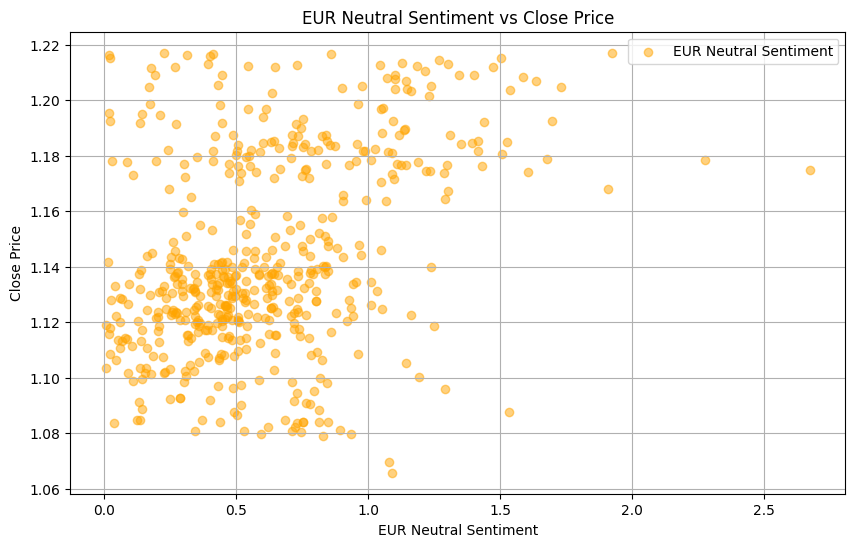

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['eur_neutral'], data['Close'], alpha=0.5, label='EUR Neutral Sentiment', color='orange')
plt.title('EUR Neutral Sentiment vs Close Price')
plt.xlabel('EUR Neutral Sentiment')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

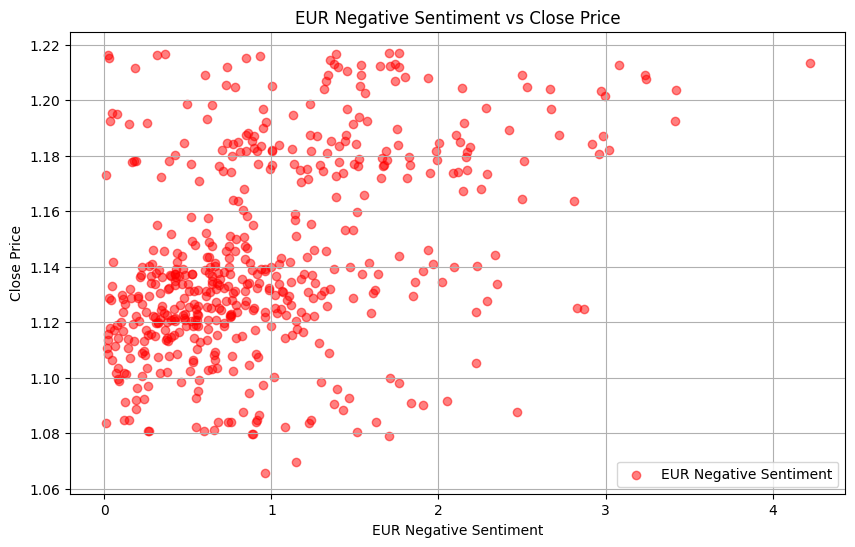

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['eur_negative'], data['Close'], alpha=0.5, label='EUR Negative Sentiment', color='red')
plt.title('EUR Negative Sentiment vs Close Price')
plt.xlabel('EUR Negative Sentiment')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()


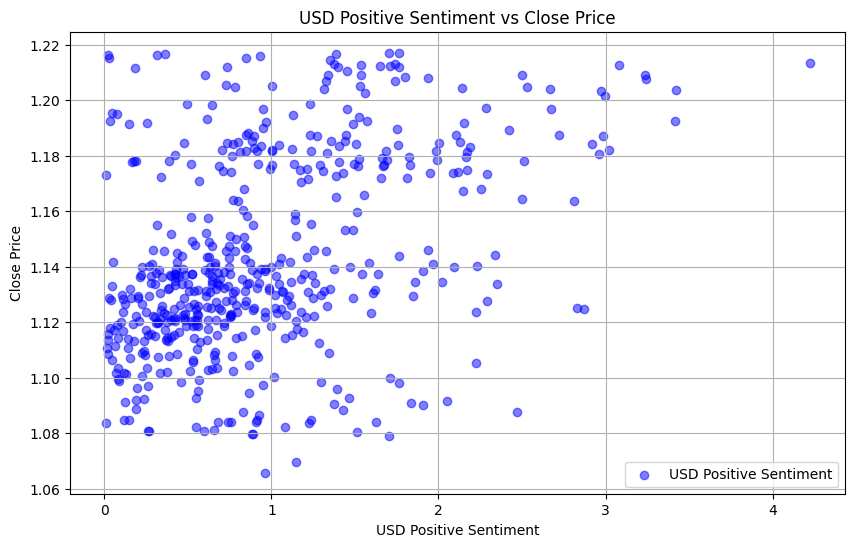

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['usd_positive'], data['Close'], alpha=0.5, label='USD Positive Sentiment', color='blue')
plt.title('USD Positive Sentiment vs Close Price')
plt.xlabel('USD Positive Sentiment')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

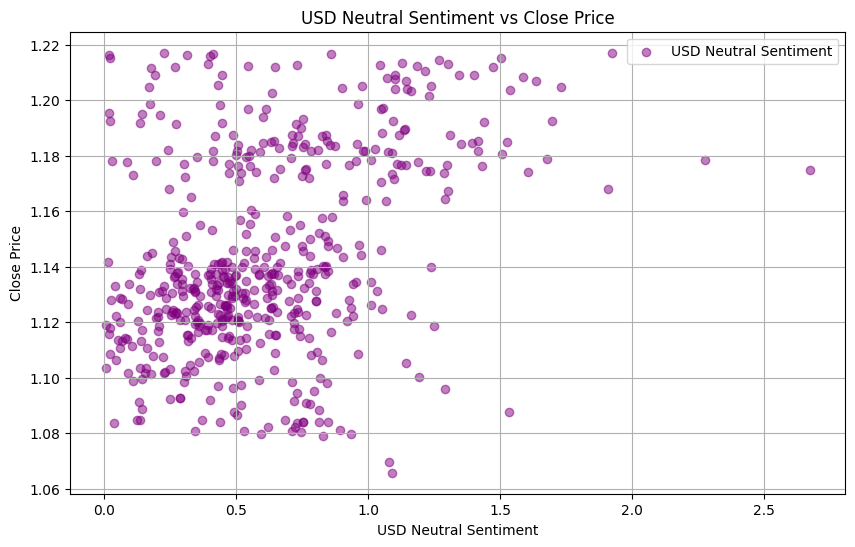

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['usd_neutral'], data['Close'], alpha=0.5, label='USD Neutral Sentiment', color='purple')
plt.title('USD Neutral Sentiment vs Close Price')
plt.xlabel('USD Neutral Sentiment')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

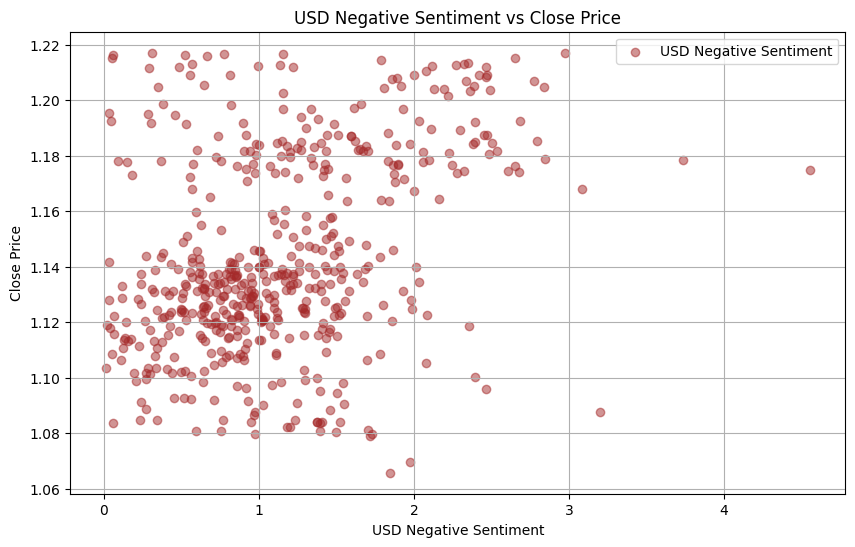

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data['usd_negative'], data['Close'], alpha=0.5, label='USD Negative Sentiment', color='brown')
plt.title('USD Negative Sentiment vs Close Price')
plt.xlabel('USD Negative Sentiment')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

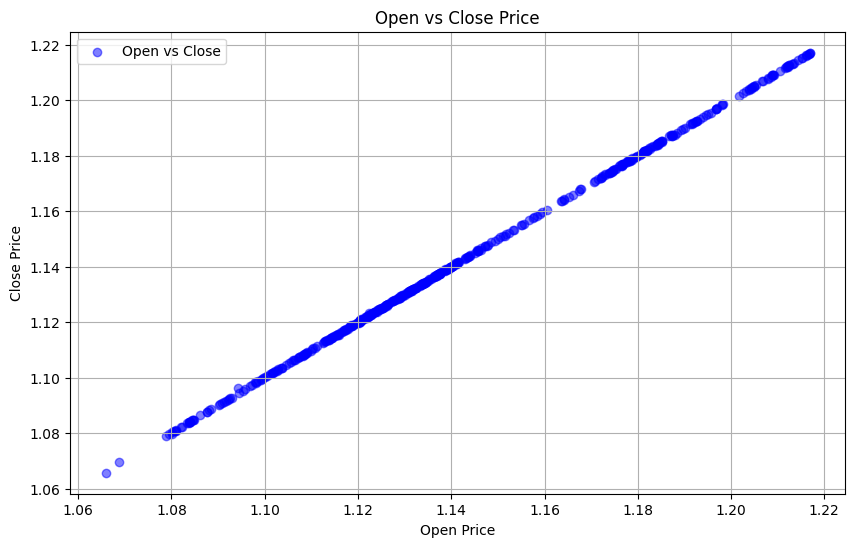

In [11]:
# The relationship between Open and Close
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], alpha=0.5, label='Open vs Close', color='blue')
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

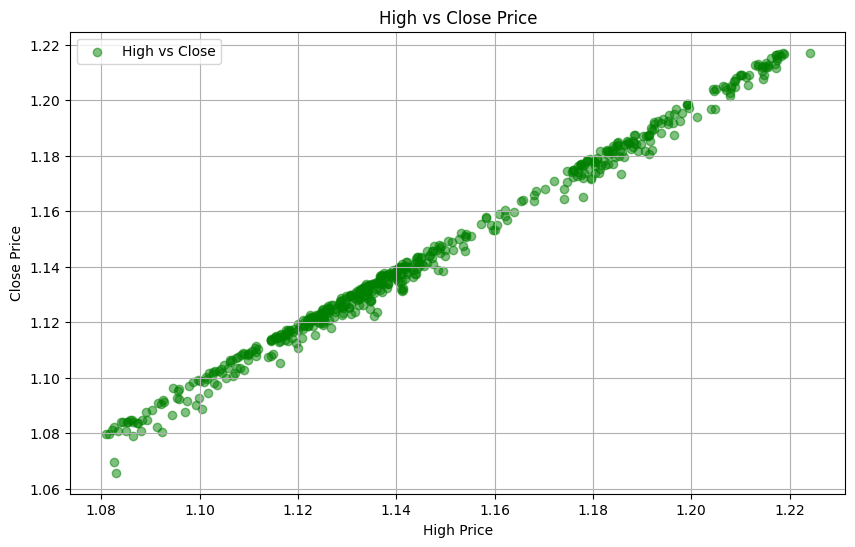

In [12]:
# The relationship between High and Close
plt.figure(figsize=(10, 6))
plt.scatter(data['High'], data['Close'], alpha=0.5, label='High vs Close', color='green')
plt.title('High vs Close Price')
plt.xlabel('High Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

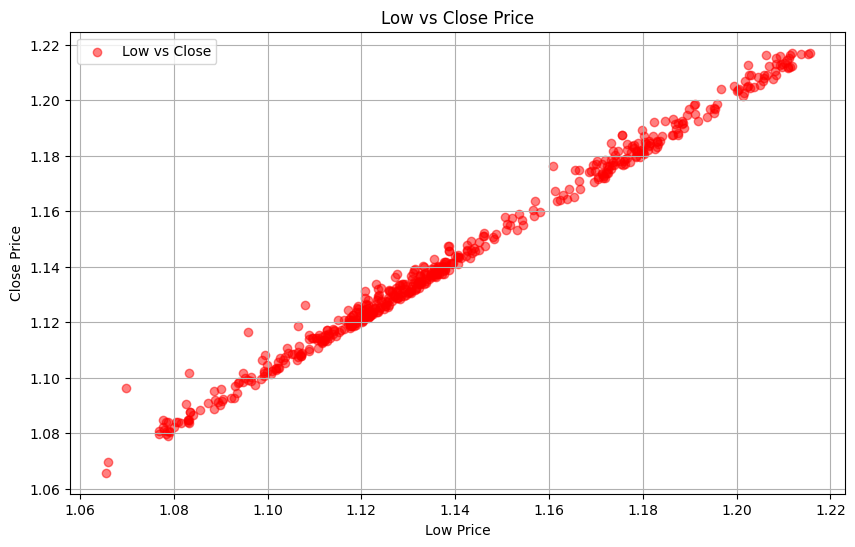

In [13]:
# Relationship between Low and Close
plt.figure(figsize=(10, 6))
plt.scatter(data['Low'], data['Close'], alpha=0.5, label='Low vs Close', color='red')
plt.title('Low vs Close Price')
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()


Coefficient (eur_pos): 0.019258487166745695
Intercept: 1.1213224991780923


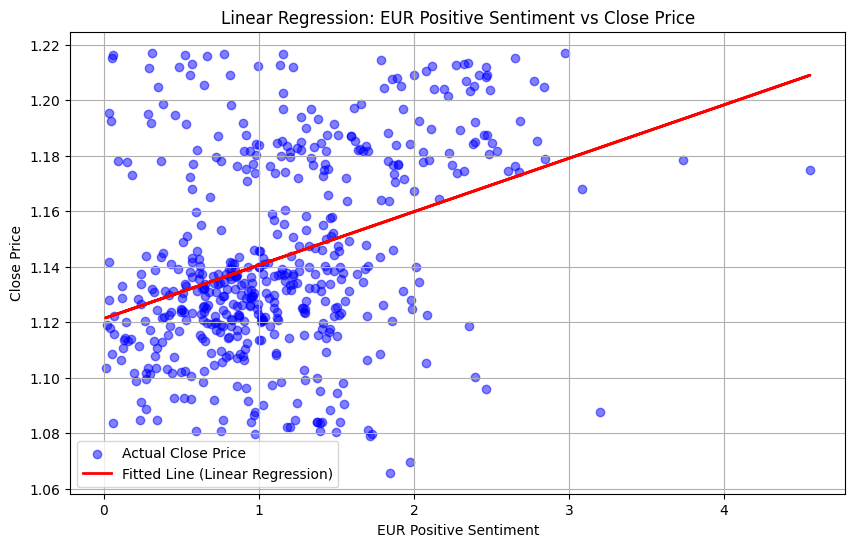

In [14]:

X = data[['eur_positive']].values  # feature
y = data['Close'].values      # Target variable "Close"

# # Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients and intercepts
print(f"Coefficient (eur_pos): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predict and plot the fit curve
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Close Price', color='blue')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line (Linear Regression)')
plt.title('Linear Regression: EUR Positive Sentiment vs Close Price')
plt.xlabel('EUR Positive Sentiment')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\THUNDEROBOT\AppData\Local\Temp\ipykernel_16404\2235952365.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Year_Month'] = data['Date'].dt.to_period('M')
C:\Users\THUNDEROBOT\AppData\Local\Temp\ipykernel_16404\2235952365.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year_Month', y='Close', data=data, palette="Set2")


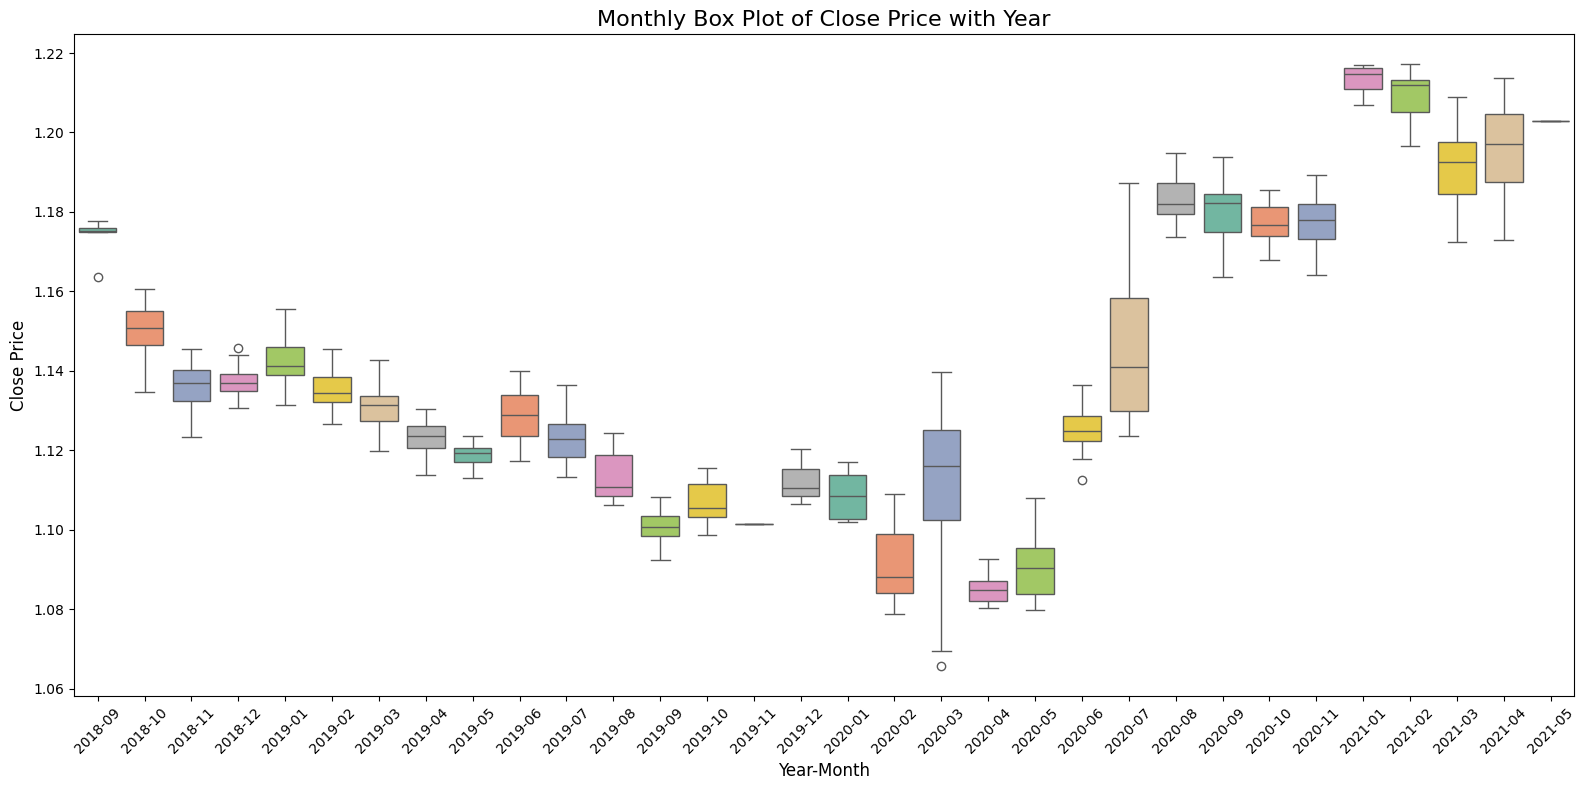

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year and month and create a new column 'Year_Month'
data['Year_Month'] = data['Date'].dt.to_period('M')  


plt.figure(figsize=(16, 8))
sns.boxplot(x='Year_Month', y='Close', data=data, palette="Set2")
plt.title('Monthly Box Plot of Close Price with Year', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

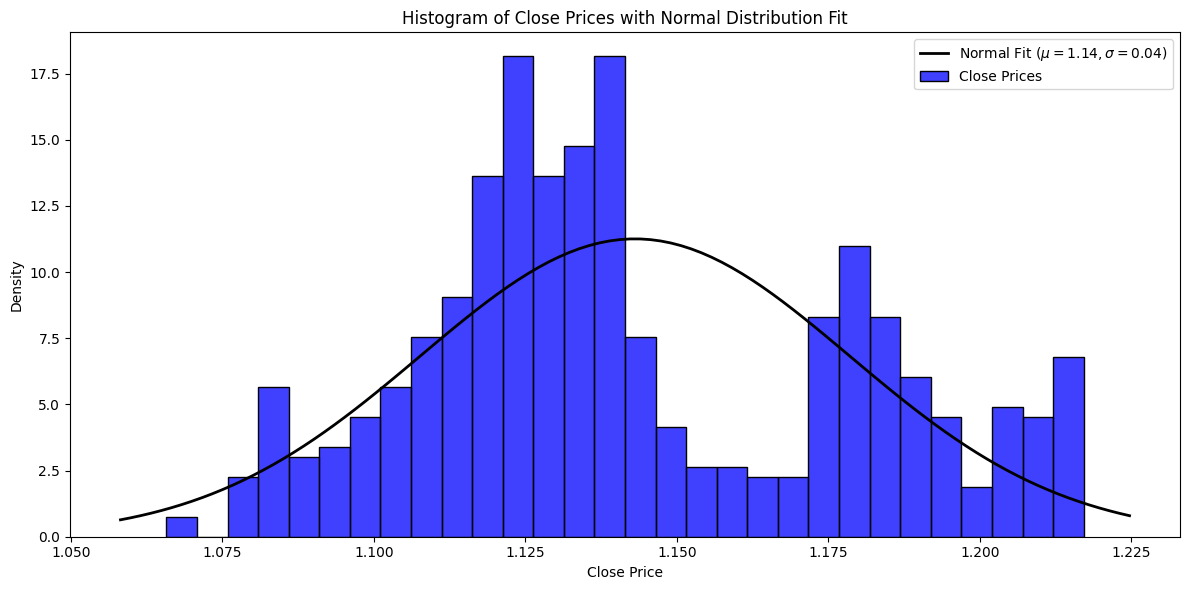

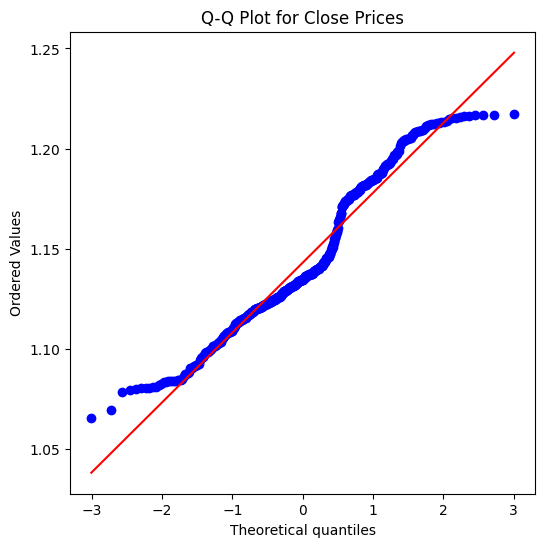

In [16]:

close_prices = data['Close']
# Create a chart that shows how a histogram fits a curve with a normal distribution
plt.figure(figsize=(12, 6))

# Draw a histogram
sns.histplot(close_prices, bins=30, kde=False, color='blue', stat='density', label='Close Prices')

# Draw a normal distribution fitting curve
mu, std = stats.norm.fit(close_prices)  # Calculate the mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit ($\mu={mu:.2f}, \sigma={std:.2f}$)')


plt.title('Histogram of Close Prices with Normal Distribution Fit')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Quantile-Quantile plot
plt.figure(figsize=(6, 6))
stats.probplot(close_prices, dist="norm", plot=plt)
plt.title('Q-Q Plot for Close Prices')
plt.show()
